In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12, 8)
plt.style.use('dark_background')

In [28]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [29]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


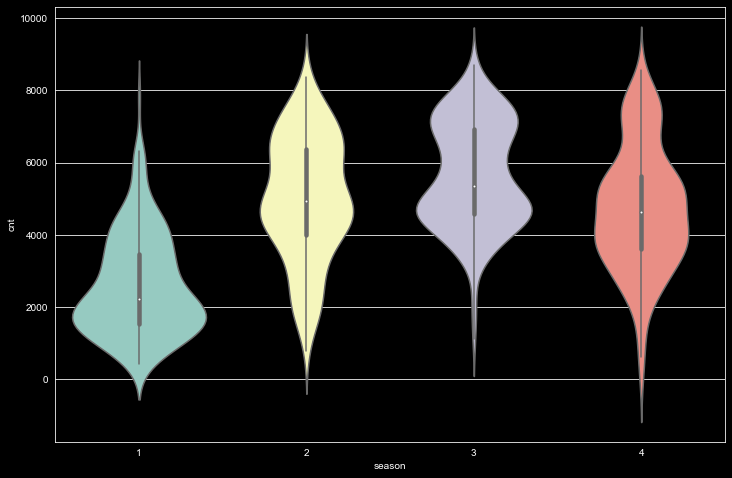

In [30]:
sns.violinplot(data['season'], data['cnt']);

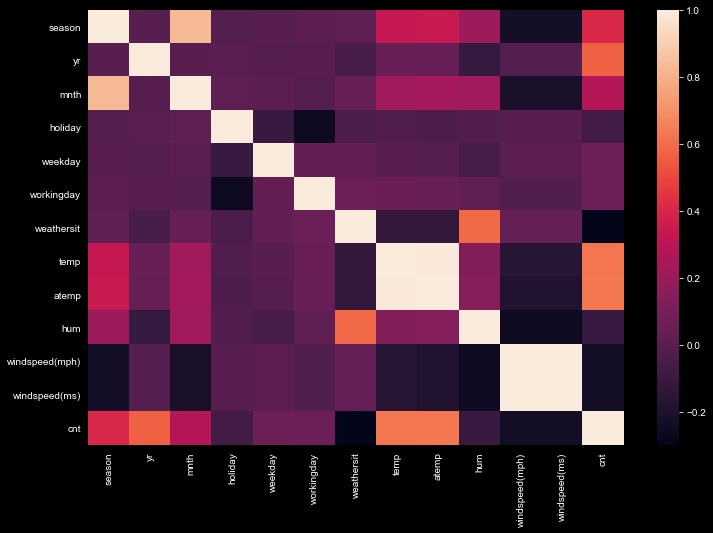

In [31]:
sns.heatmap(data.corr());

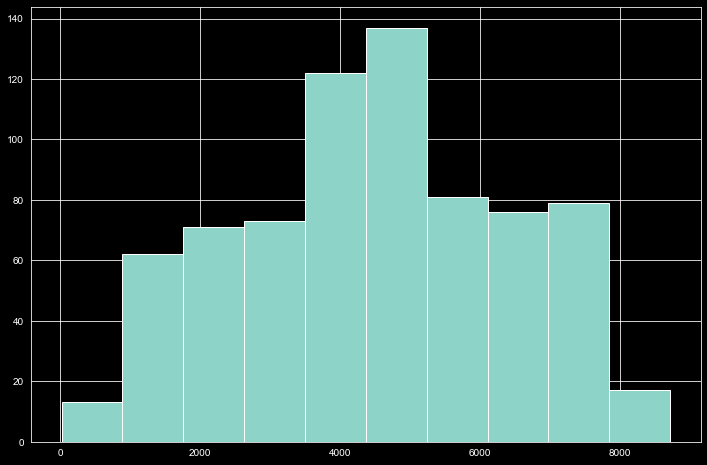

In [32]:
data['cnt'].hist();

In [33]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

In [34]:
X_df.shape

(731, 12)

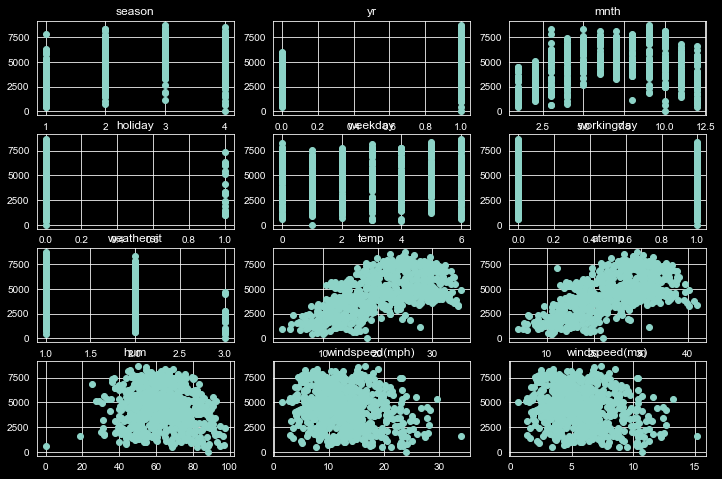

In [35]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

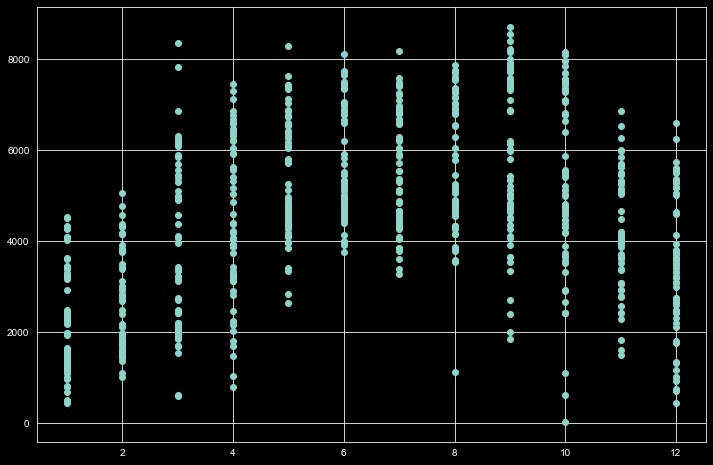

In [37]:
plt.scatter(data['mnth'], data['cnt']);

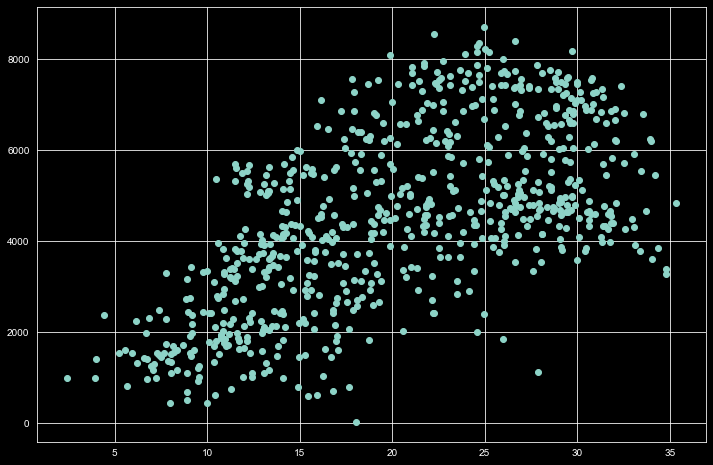

In [38]:
plt.scatter(data['temp'], data['cnt']);

In [78]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [40]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [46]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [47]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [49]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))
# получили количество велосипедов, на котрое мы ошибаемся при прогнозировании
# число допустимое, т.к. (судя по гистограмме) разброс значений идёт от 0 до ~9000

1121.795457438696

In [56]:
pd.DataFrame(linreg.coef_, data.columns[:-1], 
             columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.050956e+12
yr,9.540698e+02
atemp,8.911795e+02
season,4.048585e+02
weekday,1.037118e+02
temp,6.247792e+01
mnth,3.080906e+01
workingday,1.470271e+01
holiday,-6.757448e+01
hum,-1.589767e+02


In [85]:
def train_validate_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, 
                          feature_names, forest=False):
    '''for linear models and regression trees'''
    model.fit(X_train_scaled, y_train)
    print(f'MSE = {np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled)))}')
    print(f'Model coefficients:')
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coef'
    print(pd.DataFrame(coef, feature_names, 
                       columns=[coef_name]).sort_values(by=coef_name, ascending=False))

In [71]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

MSE = 1120.7214094932299
Model coefficients:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [72]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

MSE = 1120.7436606195301
Model coefficients:
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [73]:
lasso_cv.alphas_

array([1.00067072e+03, 9.33228862e+02, 8.70332360e+02, 8.11674872e+02,
       7.56970702e+02, 7.05953410e+02, 6.58374513e+02, 6.14002274e+02,
       5.72620576e+02, 5.34027866e+02, 4.98036175e+02, 4.64470204e+02,
       4.33166466e+02, 4.03972496e+02, 3.76746102e+02, 3.51354676e+02,
       3.27674547e+02, 3.05590379e+02, 2.84994610e+02, 2.65786927e+02,
       2.47873778e+02, 2.31167915e+02, 2.15587971e+02, 2.01058063e+02,
       1.87507423e+02, 1.74870050e+02, 1.63084394e+02, 1.52093052e+02,
       1.41842489e+02, 1.32282780e+02, 1.23367363e+02, 1.15052816e+02,
       1.07298641e+02, 1.00067072e+02, 9.33228862e+01, 8.70332360e+01,
       8.11674872e+01, 7.56970702e+01, 7.05953410e+01, 6.58374513e+01,
       6.14002274e+01, 5.72620576e+01, 5.34027866e+01, 4.98036175e+01,
       4.64470204e+01, 4.33166466e+01, 4.03972496e+01, 3.76746102e+01,
       3.51354676e+01, 3.27674547e+01, 3.05590379e+01, 2.84994610e+01,
       2.65786927e+01, 2.47873778e+01, 2.31167915e+01, 2.15587971e+01,
      

In [74]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

MSE = 1119.5605202108375
Model coefficients:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [75]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

MSE = 1118.903543321992
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [90]:
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [91]:
train_validate_report(forest, X_train, y_train, X_valid, y_valid, data.columns[:-1], 
                      forest=True)

MSE = 1046.9607717751937
Model coefficients:
                Importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615
